In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

Topic Modeling with NMF and SVD 

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

Set up data

In [7]:
# seperate categories 
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes') 

# set training and test sets 
newsgroups_train = fetch_20newsgroups(subset = 'train', categories = categories, remove = remove)
newsgroups_test = fetch_20newsgroups(subset = 'test', categories = categories, remove = remove)

In [8]:
# return shape of columns
newsgroups_train.filenames.shape, newsgroups_train.target.shape 

((2034,), (2034,))

In [9]:
# look at some of the data 
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [0]:
# return a subset of the data
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]
newsgroups_train.target[:10] 
num_topics, num_top_words = 6, 8

In [11]:
# extract word counts using skl
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vectorizer = CountVectorizer(stop_words = 'english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape

(2034, 26576)

In [12]:
print(len(newsgroups_train.data), vectors.shape)
vocab = np.array(vectorizer.get_feature_names())
vocab.shape
vocab[7000:7020]

2034 (2034, 26576)


array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

Singluar Value Decomposition 


The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

SVD is used in data science specifically for: 

- semantic analysis
- collaborative filtering / reccomendations (winning entry for the netflix prize)
- calculating the Moore-Penrose pseudoinverse
- data compression
- principal component analysis

Here is a useful youtube video: 
https://www.youtube.com/watch?v=P5mlg91as1c



In [13]:
%time U, s, Vh = linalg.svd(vectors, full_matrices = False)
print(U.shape, s.shape, Vh.shape)

CPU times: user 1min 46s, sys: 7.18 s, total: 1min 53s
Wall time: 58.4 s
(2034, 2034) (2034,) (2034, 26576)


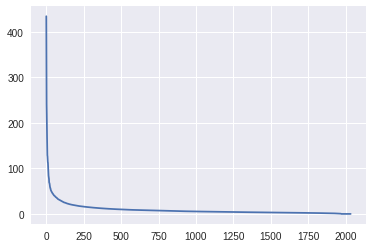

In [14]:
plt.plot(s)

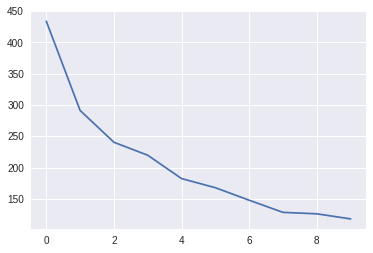

In [15]:
plt.plot(s[:10])

In [16]:
num_top_words = 8

def show_topics(a): 
  top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words - 1: -1]] 
  topic_words = ([top_words(t) for t in a])
  return [' '.join(t) for t in topic_words]

show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']